In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
item_categories = pd.read_csv('../data/item_categories.csv')
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [3]:
shops = pd.read_csv('../data/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [4]:
items = pd.read_csv('../data/items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
sales_train = pd.read_csv('../data/sales_train.csv')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
test = pd.read_csv('../data/test.csv')
test.shop_id.nunique()

42

In [7]:
shops['city'] = shops['shop_name'].str.extract(r'(\w+\.*\w*)')
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [8]:
items_with_categories = items.merge(item_categories, how='outer', on='item_category_id')
items_with_categories.head()

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


In [9]:
data = sales_train.merge(shops.iloc[:, 1:], on='shop_id')
data = data.merge(items_with_categories.drop(columns='item_name'), on='item_id')
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,city,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,Ярославль,37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,Москва,37,Кино - Blu-Ray


In [10]:
data.loc[data.item_cnt_day < 1, "item_cnt_day"] = 0
data = data[data.item_price > 0].reset_index(drop = True)

Text(0.5, 1.0, 'Month total sales')

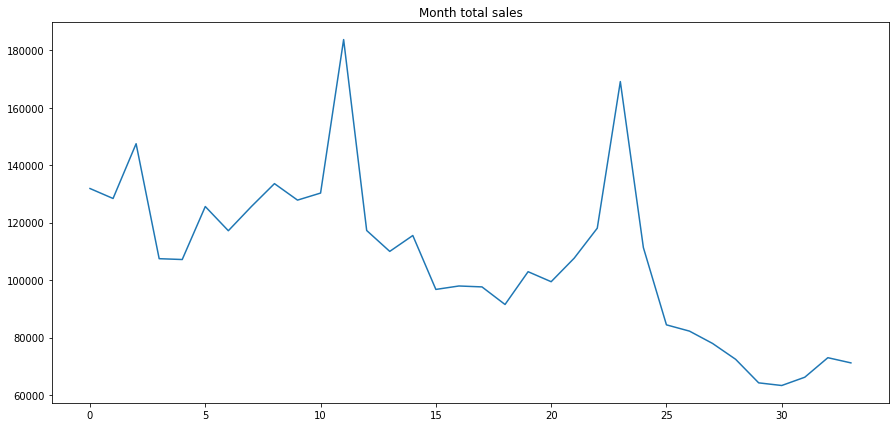

In [218]:
fig = plt.figure(figsize=(15, 7))
plt.plot(data.groupby(['date_block_num'])['item_cnt_day'].sum())
plt.title('Month total sales')

Text(0.5, 1.0, 'Month category 40 sales')

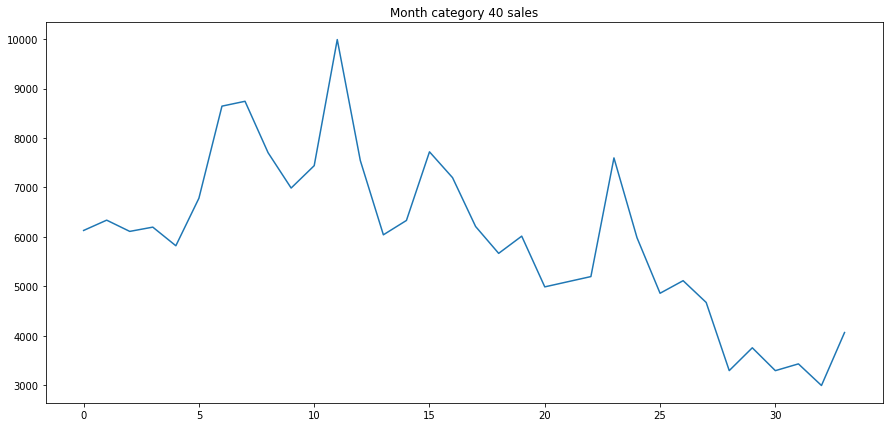

In [55]:
fig = plt.figure(figsize=(15, 7))
plt.plot(data[data.item_category_id == 37].groupby(['date_block_num'])['item_cnt_day'].sum())
plt.title('Month category 40 sales')

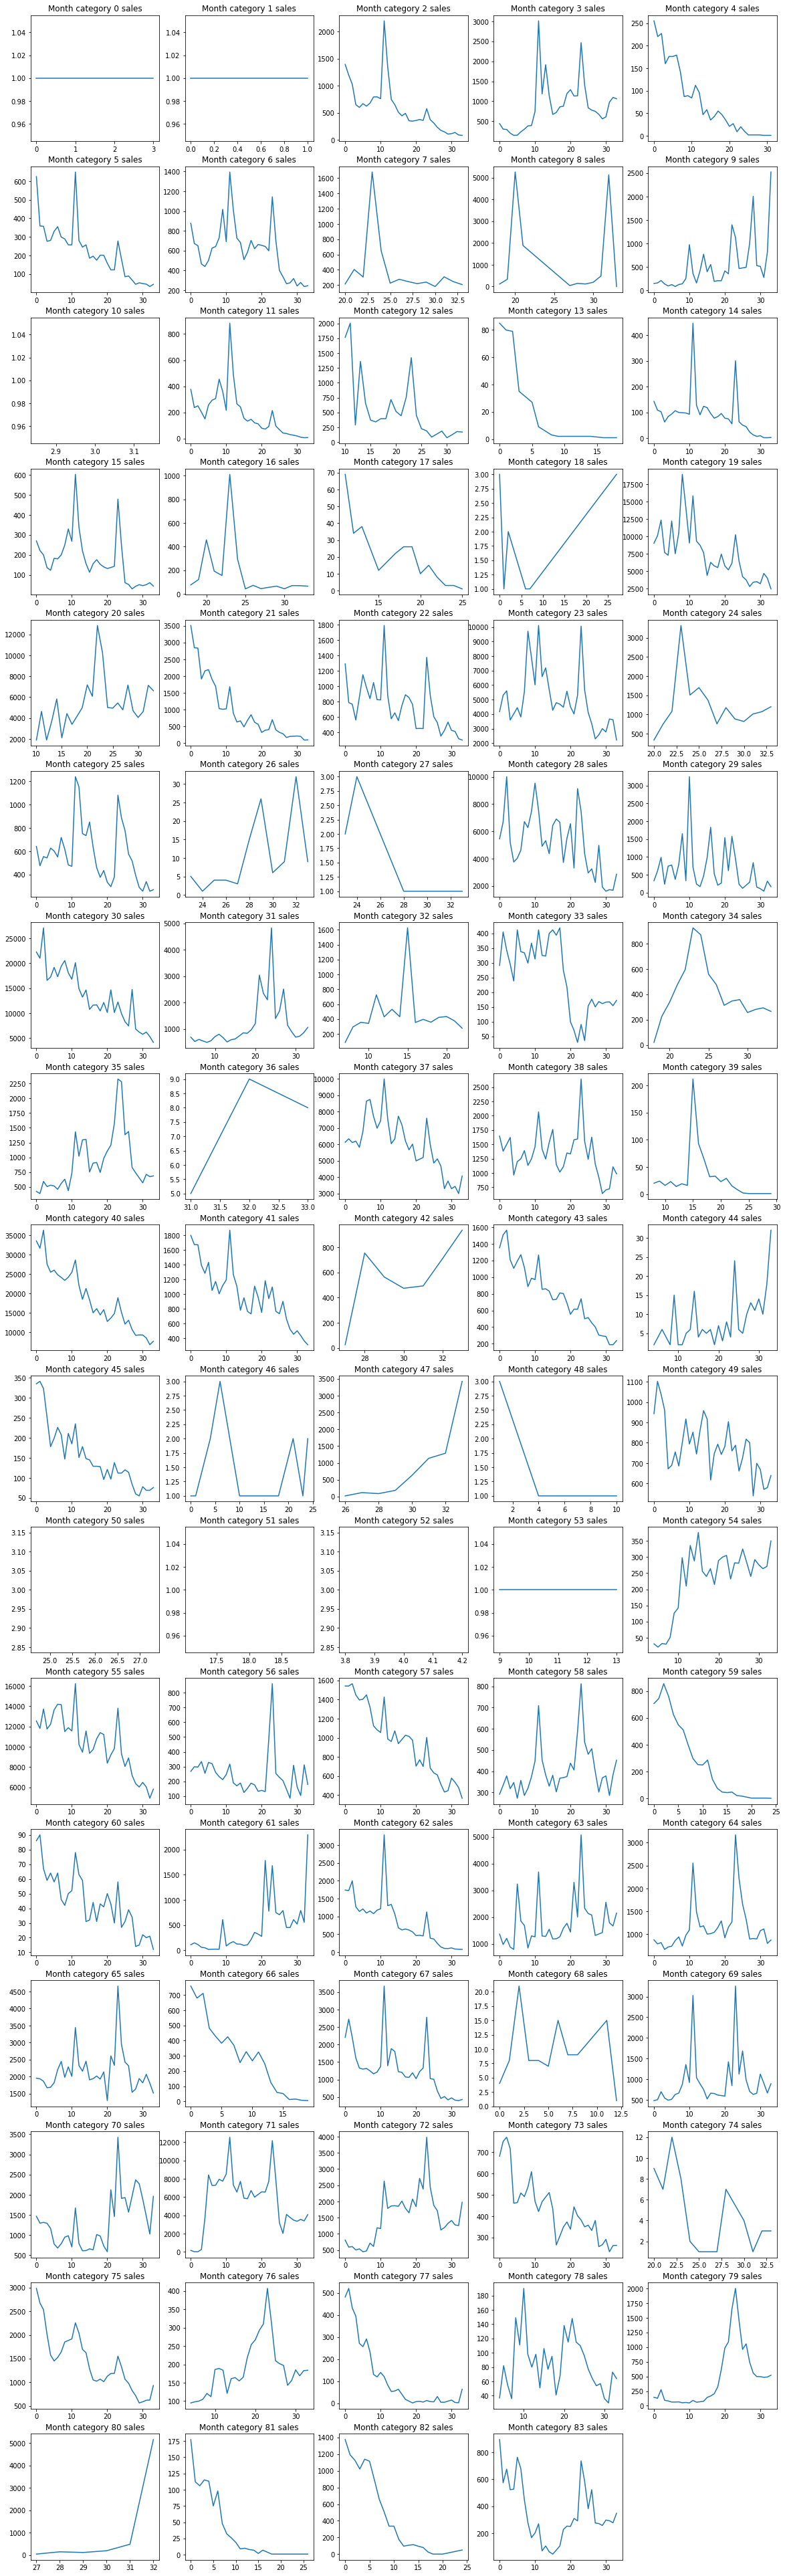

In [117]:
cats = list(data.item_category_id.unique())
cats.sort()

fig = plt.figure(figsize=(20, 70))
for i in range(len(cats)):
    plt.subplot(17, 5, i + 1)
    plt.plot(data[data.item_category_id == cats[i]].groupby(['date_block_num'])['item_cnt_day'].sum())
    plt.title('Month category {} sales'.format(cats[i]))

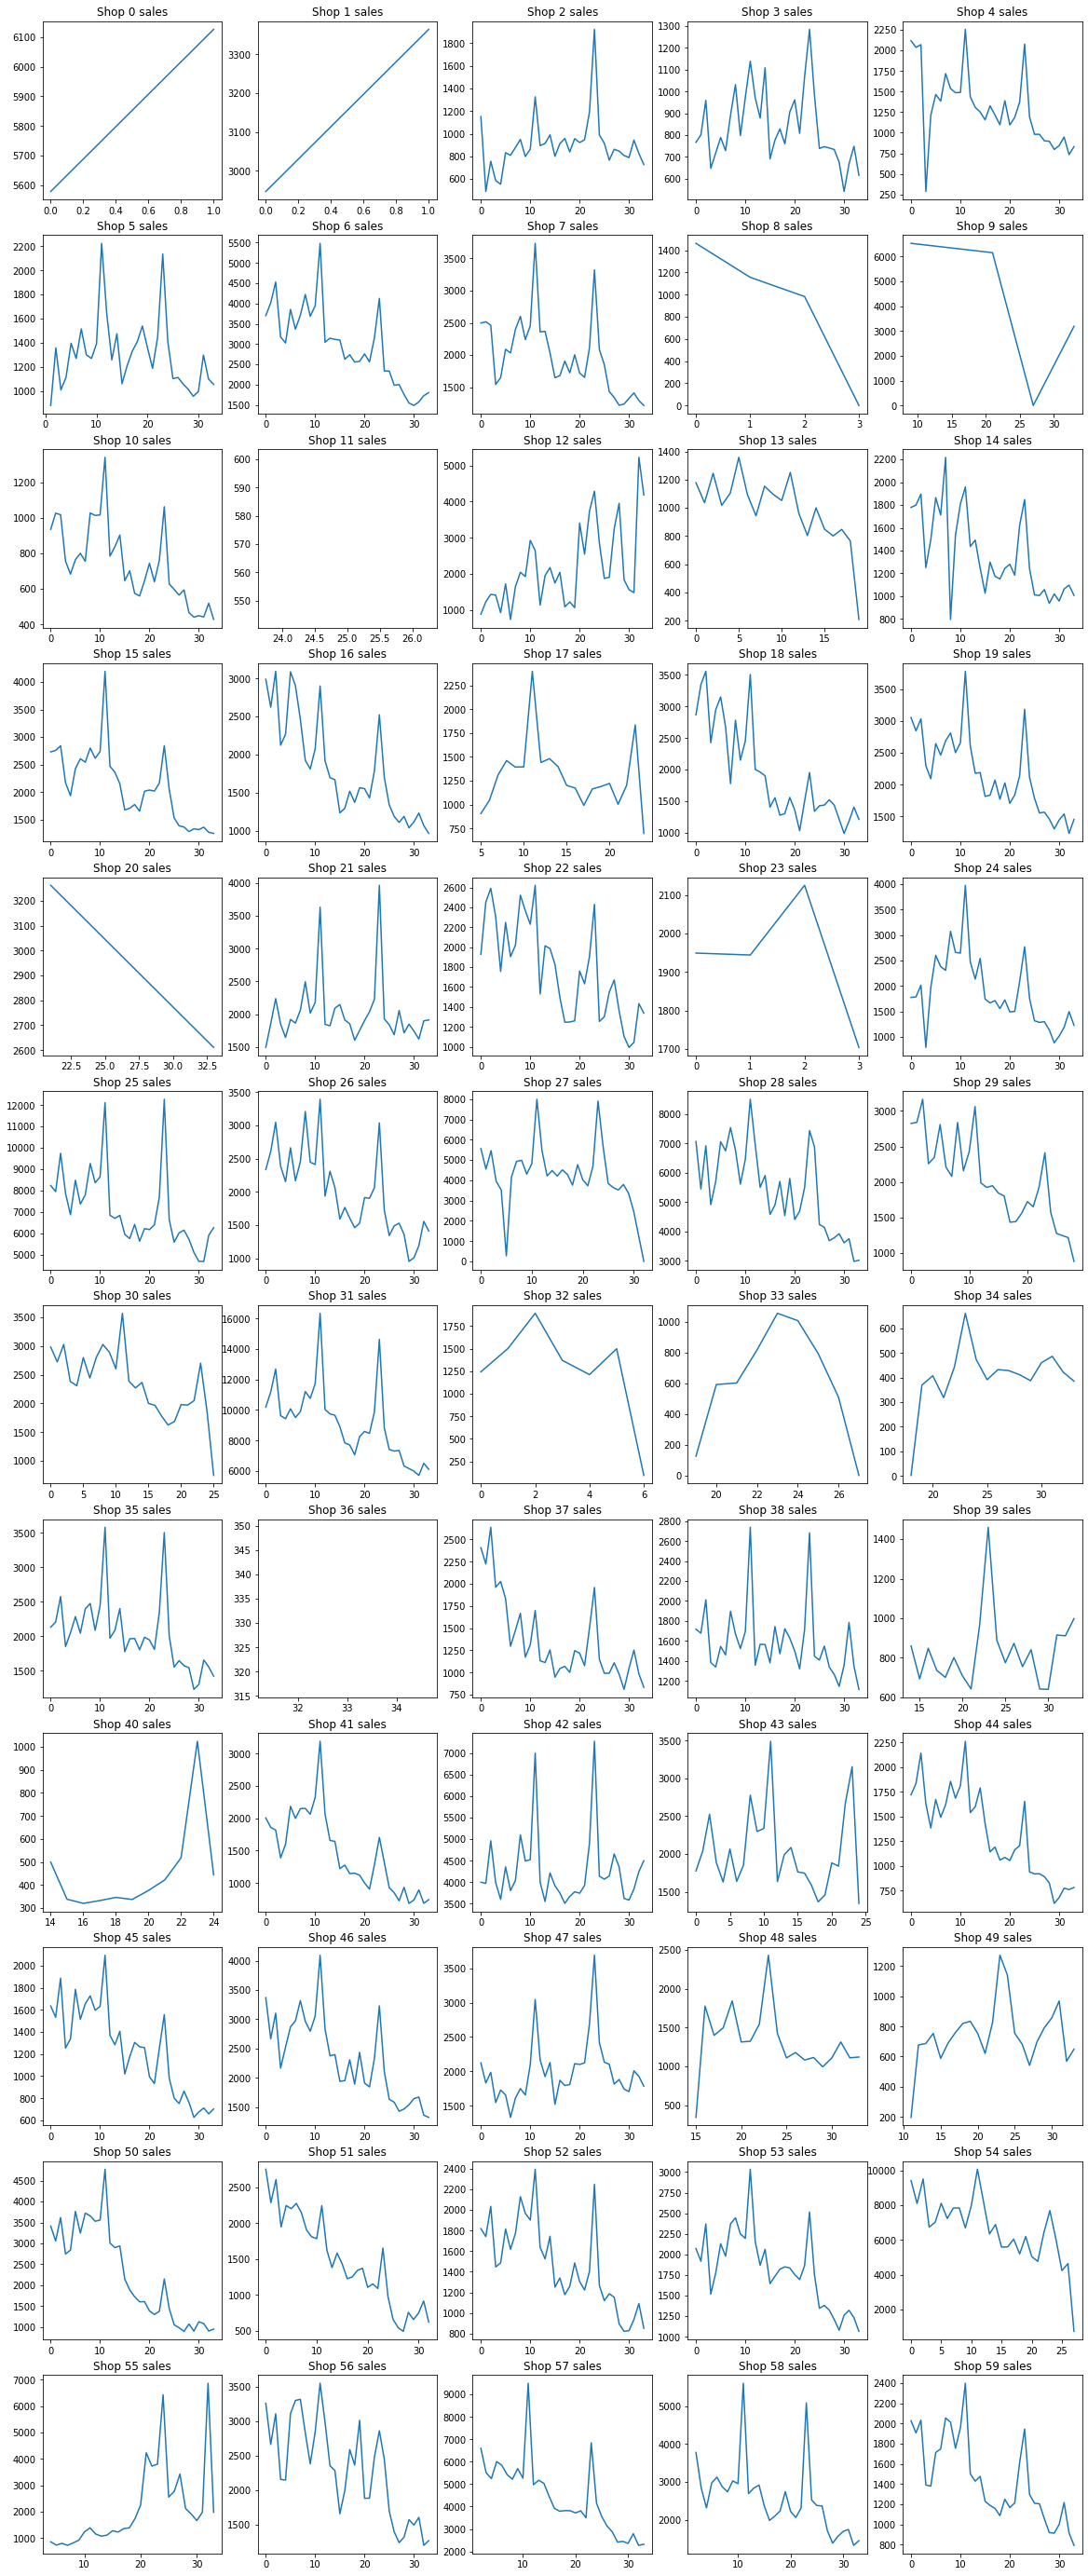

In [122]:
shps = list(data.shop_id.unique())
shps.sort()

fig = plt.figure(figsize=(20, 50))
for i in range(len(shps)):
    plt.subplot(12, 5, i + 1)
    plt.plot(data[data.shop_id == shps[i]].groupby(['date_block_num'])['item_cnt_day'].sum())
    plt.title('Shop {} sales'.format(shps[i]))

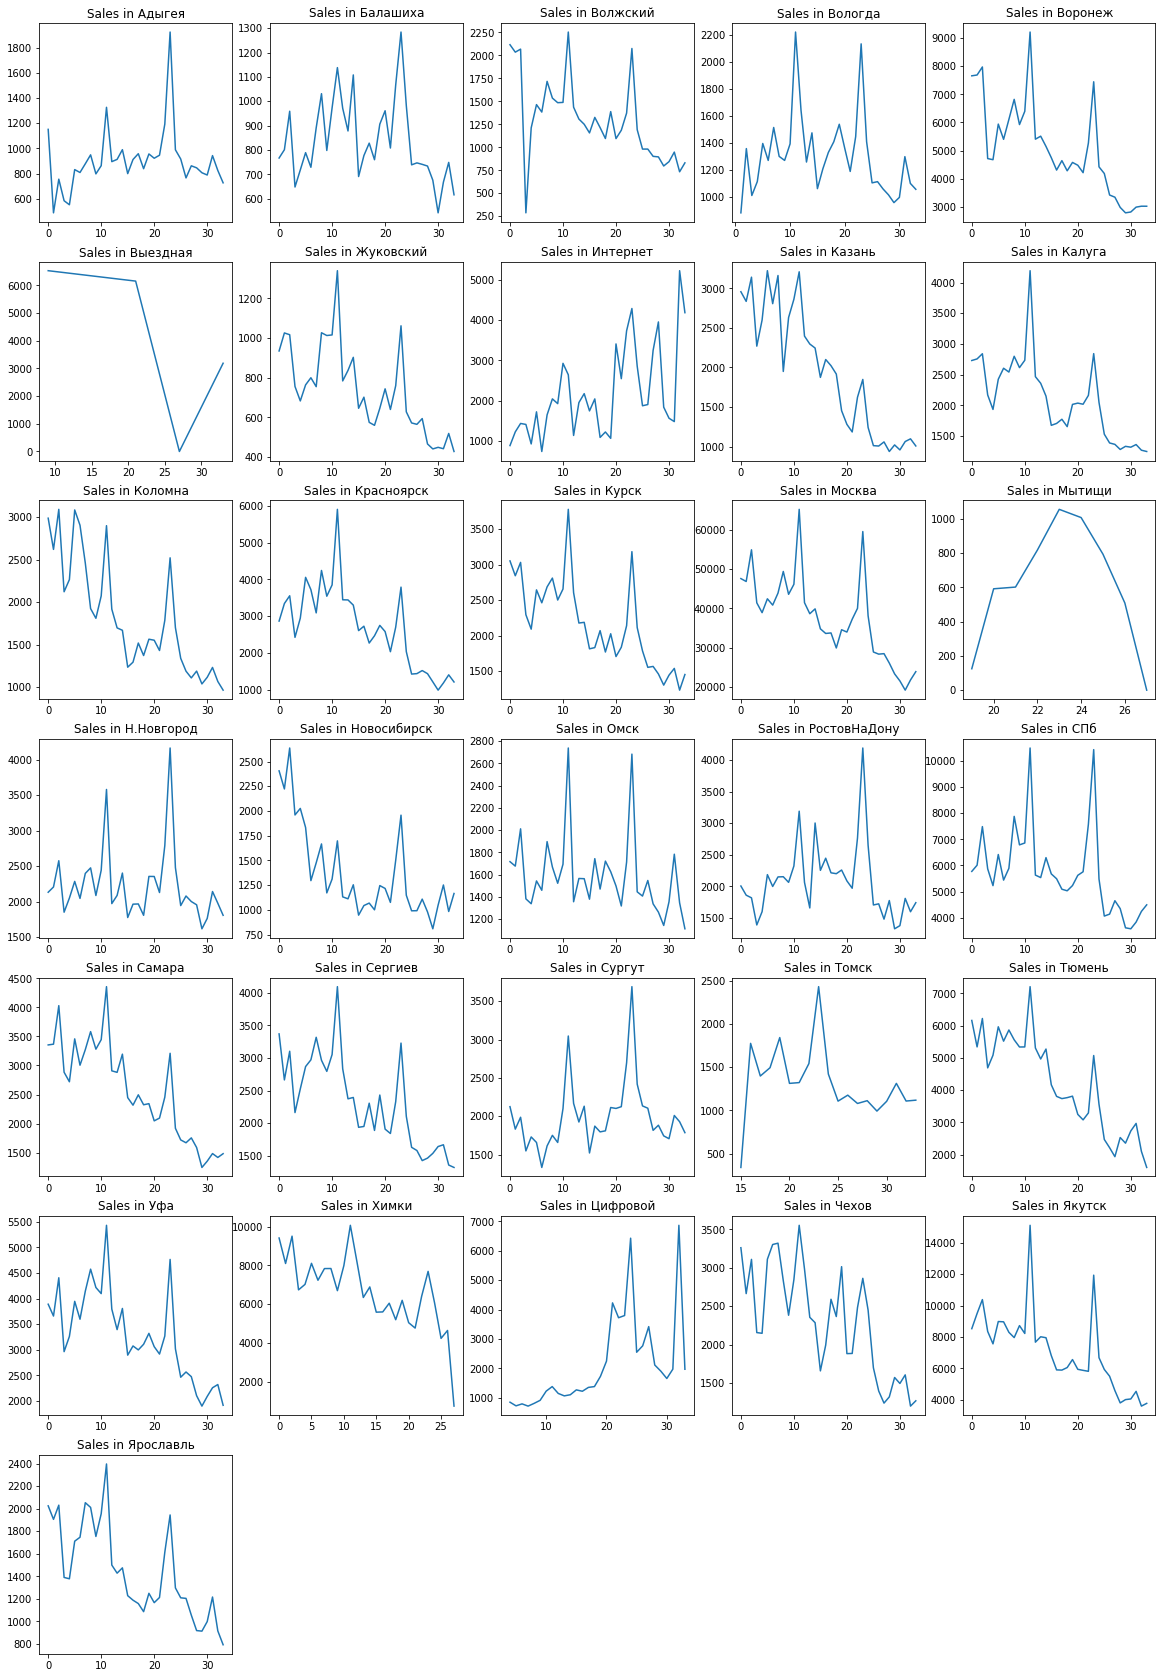

In [132]:
cities = list(data.city.unique())
cities.sort()

fig = plt.figure(figsize=(20, 30))
for i in range(len(cities)):
    plt.subplot(7, 5, i + 1)
    plt.plot(data[data.city == cities[i]].groupby(['date_block_num'])['item_cnt_day'].sum())
    plt.title('Sales in {}'.format(cities[i]))

* Outliers

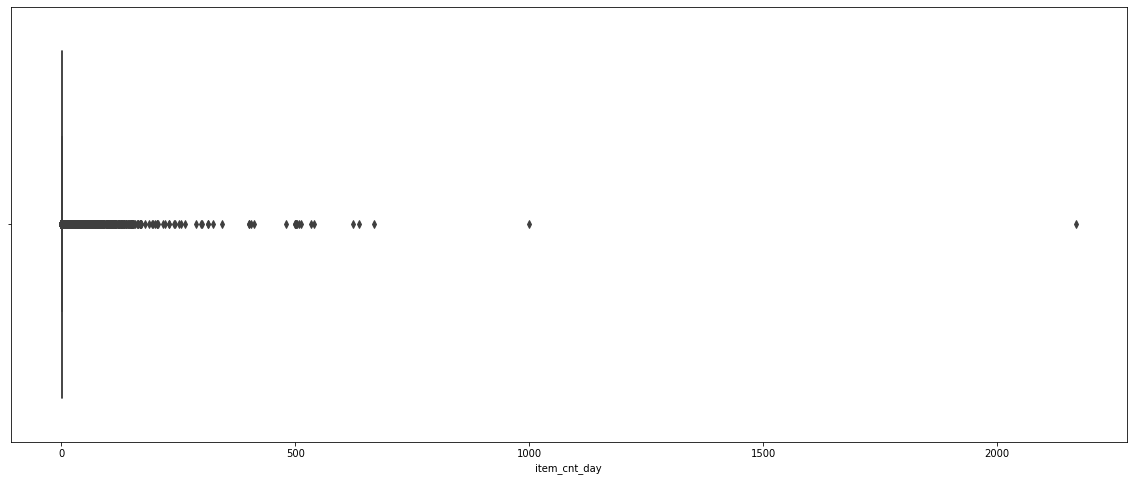

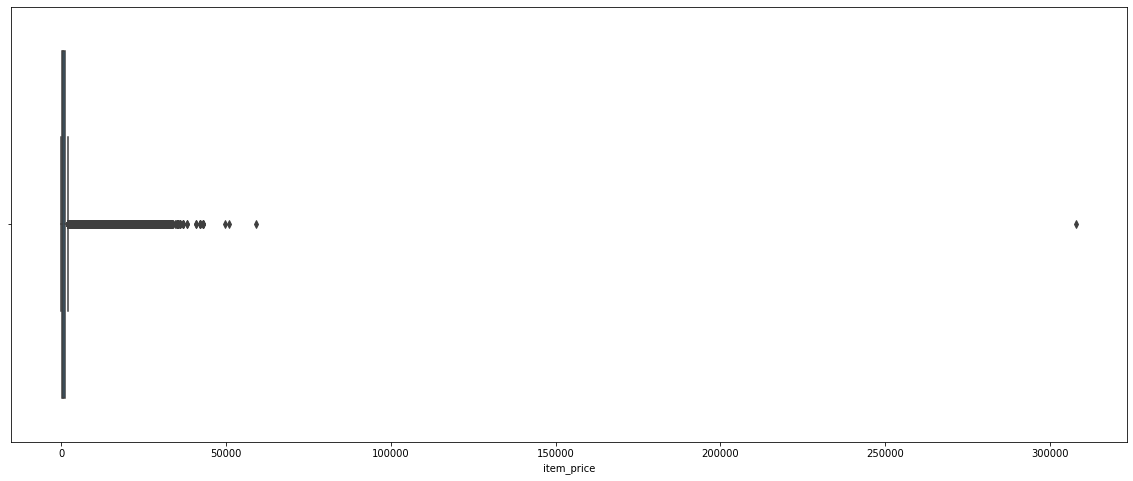

In [11]:
plt.figure(figsize=(20, 8))
sns.boxplot(x=data.item_cnt_day)
plt.show()
plt.figure(figsize=(20, 8))
sns.boxplot(x=data.item_price)
plt.show()

data = data[data.item_price < 80000]
data = data[data.item_cnt_day < 1000]

In [12]:
data.loc[data.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57

data.loc[data.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58

data.loc[data.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

In [13]:
month_data = data.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({'item_category_id': 'mean', 'item_cnt_day': 'sum', 'item_price': [min, max, 'mean']})
month_data.columns = ['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'item_cnt', 'min_price', 'max_price', 'mean_price']
month_data

,date_block_num,shop_id,item_id,item_category_id,item_cnt,min_price,max_price,mean_price
0,0,2,27,19.0,1.0,2499.0,2499.0,2499.0
1,0,2,33,37.0,1.0,499.0,499.0,499.0
2,0,2,317,45.0,1.0,299.0,299.0,299.0
3,0,2,438,45.0,1.0,299.0,299.0,299.0
4,0,2,471,49.0,2.0,399.0,399.0,399.0
...,...,...,...,...,...,...,...,...
1609117,33,59,22087,83.0,6.0,119.0,119.0,119.0
1609118,33,59,22088,83.0,2.0,119.0,119.0,119.0
1609119,33,59,22091,83.0,1.0,179.0,179.0,179.0
1609120,33,59,22100,42.0,1.0,629.0,629.0,629.0


In [14]:
month_data['revenue'] = month_data['item_cnt'] * month_data['mean_price']
month_data

,date_block_num,shop_id,item_id,item_category_id,item_cnt,min_price,max_price,mean_price,revenue
0,0,2,27,19.0,1.0,2499.0,2499.0,2499.0,2499.0
1,0,2,33,37.0,1.0,499.0,499.0,499.0,499.0
2,0,2,317,45.0,1.0,299.0,299.0,299.0,299.0
3,0,2,438,45.0,1.0,299.0,299.0,299.0,299.0
4,0,2,471,49.0,2.0,399.0,399.0,399.0,798.0
...,...,...,...,...,...,...,...,...,...
1609117,33,59,22087,83.0,6.0,119.0,119.0,119.0,714.0
1609118,33,59,22088,83.0,2.0,119.0,119.0,119.0,238.0
1609119,33,59,22091,83.0,1.0,179.0,179.0,179.0,179.0
1609120,33,59,22100,42.0,1.0,629.0,629.0,629.0,629.0


In [15]:
test = test.merge(items.iloc[:, 1:], how='left', on='item_id')
test['date_block_num'] = 34

In [16]:
month_data = pd.concat([month_data, test.drop(columns=['ID'])], ignore_index=True)
month_data

,date_block_num,shop_id,item_id,item_category_id,item_cnt,min_price,max_price,mean_price,revenue
0,0,2,27,19.0,1.0,2499.0,2499.0,2499.0,2499.0
1,0,2,33,37.0,1.0,499.0,499.0,499.0,499.0
2,0,2,317,45.0,1.0,299.0,299.0,299.0,299.0
3,0,2,438,45.0,1.0,299.0,299.0,299.0,299.0
4,0,2,471,49.0,2.0,399.0,399.0,399.0,798.0
...,...,...,...,...,...,...,...,...,...
1823317,34,45,18454,55.0,NaN,NaN,NaN,NaN,NaN
1823318,34,45,16188,64.0,NaN,NaN,NaN,NaN,NaN
1823319,34,45,15757,55.0,NaN,NaN,NaN,NaN,NaN
1823320,34,45,19648,40.0,NaN,NaN,NaN,NaN,NaN


In [17]:
train = pd.DataFrame()
for i in range(12, 35):
    temp = month_data[month_data.date_block_num == i]
    temp12 = month_data[(month_data.date_block_num == i - 12)]
    temp1 = month_data[(month_data.date_block_num == i - 1)]
    temp5 = month_data[(month_data.date_block_num >= i - 5) & (month_data.date_block_num < i)]
    temp12 = temp12.groupby(['shop_id', 'item_id'], as_index=False).agg({'item_cnt': 'sum', 'mean_price': 'mean', 'revenue': 'sum'})
    temp12 = temp12.rename({'item_cnt': 'cnt_12', 'mean_price': 'price_12', 'revenue': 'revenue_12'}, axis=1)
    temp1 = temp1.groupby(['shop_id', 'item_id'], as_index=False).agg({'item_cnt': 'sum', 'mean_price': 'mean', 'revenue': 'sum'})
    temp1 = temp1.rename({'item_cnt': 'cnt_last1', 'mean_price': 'price_last1', 'revenue': 'revenue_last1'}, axis=1)
    temp5 = temp5.groupby(['shop_id', 'item_id'], as_index=False).agg({'item_cnt': 'sum', 'mean_price': 'mean', 'revenue': 'sum'})
    temp5 = temp5.rename({'item_cnt': 'cnt_last5', 'mean_price': 'price_last5', 'revenue': 'revenue_last5'}, axis=1)
    temp = temp.merge(temp12, how='left', on=['shop_id', 'item_id'])
    temp = temp.merge(temp1, how='left', on=['shop_id', 'item_id'])
    temp = temp.merge(temp5, how='left', on=['shop_id', 'item_id'])
    train = pd.concat([train, temp], ignore_index=True)

In [18]:
train = train.fillna(0)
train.drop(columns=['min_price', 'max_price', 'mean_price', 'revenue'], inplace=True)
train

,date_block_num,shop_id,item_id,item_category_id,item_cnt,cnt_12,price_12,revenue_12,cnt_last1,price_last1,revenue_last1,cnt_last5,price_last5,revenue_last5
0,12,2,32,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,2,33,37.0,1.0,1.0,499.0,499.0,1.0,199.0,199.0,3.0,199.0,597.0
2,12,2,99,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,2,482,73.0,2.0,1.0,3300.0,3300.0,1.0,3300.0,3300.0,6.0,3300.0,19800.0
4,12,2,485,73.0,1.0,0.0,0.0,0.0,1.0,300.0,300.0,7.0,300.0,2100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135594,34,45,18454,55.0,0.0,0.0,0.0,0.0,1.0,99.0,99.0,1.0,99.0,99.0
1135595,34,45,16188,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1135596,34,45,15757,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1135597,34,45,19648,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_train = train[train.date_block_num < 33].drop(['item_cnt', 'date_block_num'], axis=1)
y_train = train[train.date_block_num < 33]['item_cnt']
X_valid = train[train.date_block_num == 33].drop(['item_cnt', 'date_block_num'], axis=1)
y_valid = train[train.date_block_num == 33]['item_cnt']
X_test = train[train.date_block_num == 34].drop(['item_cnt', 'date_block_num'], axis=1)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
reg = RandomForestRegressor(n_estimators=10)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_valid)
rms = mean_squared_error(y_valid, y_pred, squared=False)

In [22]:
rms

6.40711778351771

In [23]:
y_test = reg.predict(X_test)
submission = pd.DataFrame({
    "ID": np.arange(y_test.shape[0]), 
    "item_cnt_month": y_test
})
submission.to_csv('../data/submission.csv', index=False)

In [24]:
y_test.shape

(214200,)